In [1]:
pip install shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from shapely.geometry import Polygon

# Define your polygons
polygon1 = Polygon([(0, 1), (-1, 0), (1, 0)])
query_geom = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

# Calculate the intersection
intersection = polygon1.intersection(query_geom)

# Check if intersection is empty
if not intersection.is_empty:
    print("Intersection:", intersection)
else:
    print("No intersection")

# Optionally, print the intersection in a more readable format
if not intersection.is_empty:
    print("Intersection Area:", intersection.area)

Intersection: POLYGON ((0 0, 0 1, 1 0, 0 0))
Intersection Area: 0.5


Intersection 1: LINESTRING (1 0, 1 1)
Intersection 2: POLYGON ((1 0, 0 0, 0 1, 1 0))
Intersection 3: POLYGON ((1 0, 0.75 0, 1 1, 1 0))


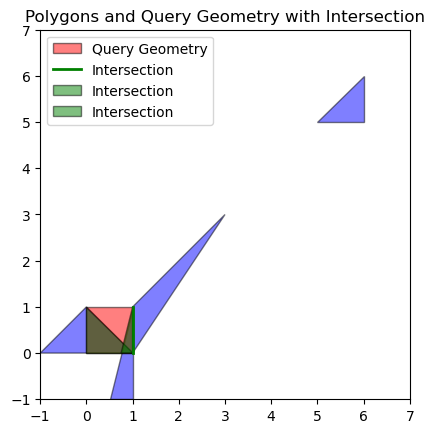

In [3]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.strtree import STRtree

# Define the polygons
polys = [
    Polygon([(3, 3), (1, 0), (1, 1)]),  # Polygon 1
    Polygon([(0, 1), (1, 0), (-1, 0)]),  # Polygon 2
    Polygon([(5, 5), (6, 5), (6, 6)]),  # Polygon 3
    Polygon([(0.5, -1), (1, -1), (1, 1)]),  # Polygon 4
]

s = STRtree(polys)

query_geom = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

# Query the spatial index for potential intersections
result_indices = s.query(query_geom)

intersections = []
for index in result_indices:
    intersection = polys[index].intersection(query_geom)
    if not intersection.is_empty:  # Check if the intersection is not empty
        intersections.insert(0, intersection)

# Output the resulting intersections
for i, inter in enumerate(intersections):
    print(f"Intersection {i + 1}: {inter}")

# Plotting
fig, ax = plt.subplots()

# Plot the original polygons
for poly in polys:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='blue', ec='black')

# Plot the query geometry
qx, qy = query_geom.exterior.xy
ax.fill(qx, qy, alpha=0.5, fc='red', ec='black', label='Query Geometry')

# Plot the intersections
for inter in intersections:
    if isinstance(inter, Polygon):
        ix, iy = inter.exterior.xy
        ax.fill(ix, iy, alpha=0.5, fc='green', ec='black', label='Intersection')
    elif isinstance(inter, (LineString, MultiLineString)):
        ix, iy = inter.xy
        ax.plot(ix, iy, color='green', linewidth=2, label='Intersection')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Polygons and Query Geometry with Intersection')
ax.legend()

plt.show()

Intersection 1: LINESTRING (1 0, 1 1)
Centroid 1: POINT (1 0.5)
Intersection 2: POLYGON ((1 0, 0 0, 0 1, 1 0))
Centroid 2: POINT (0.3333333333333333 0.3333333333333333)


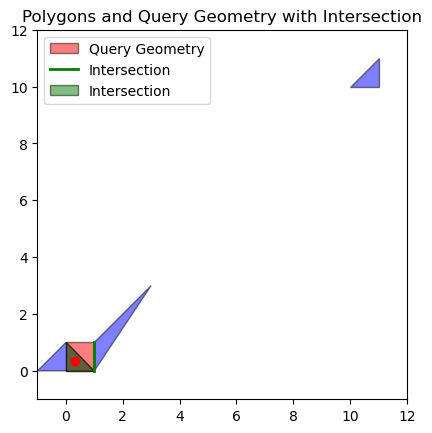

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.strtree import STRtree

# Define the polygons
polys = [
    Polygon([(3, 3), (1, 0), (1, 1)]),  # Polygon 1
    Polygon([(0, 1), (1, 0), (-1, 0)]),  # Polygon 2
    Polygon([(10, 10), (11, 10), (11, 11)]),  # Polygon 3
]

s = STRtree(polys)

query_geom = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])

# Query the spatial index for potential intersections
result_indices = s.query(query_geom)

intersections = []
centroids = []
for index in result_indices:
    intersection = polys[index].intersection(query_geom)
    if not intersection.is_empty:  # Check if the intersection is not empty
        intersections.insert(0, intersection)
        centroids.insert(0, intersection.centroid)  # Calculate and store the centroid

# Output the resulting intersections and their centroids
for i, inter in enumerate(intersections):
    print(f"Intersection {i + 1}: {inter}")
    print(f"Centroid {i + 1}: {centroids[i]}")

# Plotting
fig, ax = plt.subplots()

# Plot the original polygons
for poly in polys:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='blue', ec='black')

# Plot the query geometry
qx, qy = query_geom.exterior.xy
ax.fill(qx, qy, alpha=0.5, fc='red', ec='black', label='Query Geometry')

# Plot the intersections and their centroids
for inter, centroid in zip(intersections, centroids):
    if isinstance(inter, Polygon):
        ix, iy = inter.exterior.xy
        ax.fill(ix, iy, alpha=0.5, fc='green', ec='black', label='Intersection')
        # Plot the centroid
        ax.plot(centroid.x, centroid.y, 'ro')  # Red dot for centroid
    elif isinstance(inter, (LineString, MultiLineString)):
        ix, iy = inter.xy
        ax.plot(ix, iy, color='green', linewidth=2, label='Intersection')

ax.set_xlim(-1, 12)
ax.set_ylim(-1, 12)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Polygons and Query Geometry with Intersection')
ax.legend()

plt.show()

Intersection 1: POLYGON ((-151.53505028004 -89.761569673896, -151.53505028004 -89.068587, -102.226492 -89.068587, -102.226492 -89.761569673896, -151.53505028004 -89.761569673896))
Intersection 2: POLYGON ((-154.58027984325 -89.770792944124, -154.58027984325 -89.068587, -102.226492 -89.068587, -102.226492 -89.770792944124, -154.58027984325 -89.770792944124))
Intersection 3: POLYGON ((-152.91945283321 -89.761234004762, -152.91945283321 -89.068587, -102.226492 -89.068587, -102.226492 -89.761234004762, -152.91945283321 -89.761234004762))


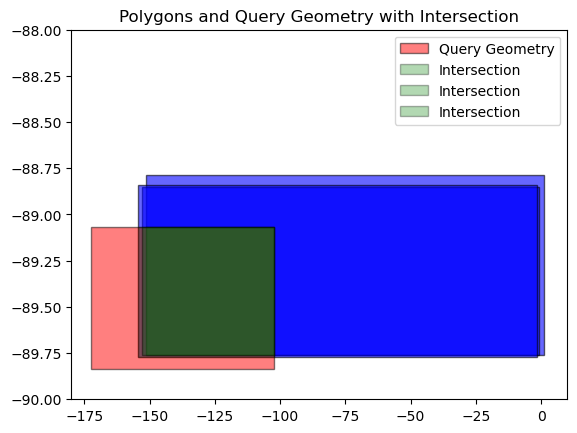

In [71]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.strtree import STRtree

# Define the polygons
# M139797542LE.camrange.cub.txt, M139811097LE.camrange.cub.txt, M139817894LE.camrange.cub.txt
polys = [
    Polygon([(-151.53505028004, -89.761569673896), (0.9633800784261, -89.761569673896),
             (0.9633800784261, -88.78788270497), (-151.53505028004, -88.78788270497)]),
    Polygon([(-152.91945283321, -89.761234004762), (-0.71217786308119, -89.761234004762),
             (-0.71217786308119, -88.849225359493), (-152.91945283321, -88.849225359493)]),
    Polygon([(-154.58027984325, -89.770792944124), (-1.4558923864427, -89.770792944124),
             (-1.4558923864427, -88.838564959607), (-154.58027984325, -88.838564959607)]),
]

# Create a spatial index
s = STRtree(polys)

# Define the query geometry
query_geom = Polygon([(-172.318538, -89.835617), (-102.226492, -89.835617),
                      (-102.226492, -89.068587), (-172.318538, -89.068587)])

# Query the spatial index for potential intersections
result_indices = s.query(query_geom)

intersections = []
for index in result_indices:
    intersection = polys[index].intersection(query_geom)
    if not intersection.is_empty:  # Check if the intersection is not empty
        intersections.insert(0, intersection)

# Output the resulting intersections
for i, inter in enumerate(intersections):
    print(f"Intersection {i + 1}: {inter}")

# Plotting
fig, ax = plt.subplots()

# Plot the original polygons
for poly in polys:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.6, fc='blue', ec='black')

# Plot the query geometry
qx, qy = query_geom.exterior.xy
ax.fill(qx, qy, alpha=0.5, fc='red', ec='black', label='Query Geometry')

# Plot the intersections
for inter in intersections:
    if isinstance(inter, Polygon):
        ix, iy = inter.exterior.xy
        ax.fill(ix, iy, alpha=0.3, fc='green', ec='black', label='Intersection')
    elif isinstance(inter, (LineString, MultiLineString)):
        ix, iy = inter.xy
        ax.plot(ix, iy, color='green', linewidth=2, label='Intersection')

# Set limits for x and y axes
ax.set_xlim(-180, 10)
ax.set_ylim(-90, -88)  # Set y-limits to reflect original values

# Set the aspect ratio
ax.set_aspect('auto')  # Allow stretching along the y-axis

ax.set_title('Polygons and Query Geometry with Intersection')
ax.legend()

plt.show()

Intersection 1 between Polygon 1 and Polygon 2: POLYGON ((-151.53505028004 -89.068587, -102.226492 -89.068587, -102.226492 -89.761569673896, -151.53505028004 -89.761569673896, -151.53505028004 -89.068587))
Centroid 1: POINT (-126.88077114001997 -89.415078336948)
Intersection 2 between Polygon 1 and Polygon 3: POLYGON ((-151.53505028004 -89.068587, -102.226492 -89.068587, -102.226492 -89.761234004762, -151.53505028004 -89.761234004762, -151.53505028004 -89.068587))
Centroid 2: POINT (-126.88077114001999 -89.414910502381)
Intersection 3 between Polygon 2 and Polygon 3: POLYGON ((-102.226492 -89.068587, -102.226492 -89.761234004762, -152.91945283321 -89.761234004762, -152.91945283321 -89.068587, -102.226492 -89.068587))
Centroid 3: POINT (-127.57297241660498 -89.41491050238099)


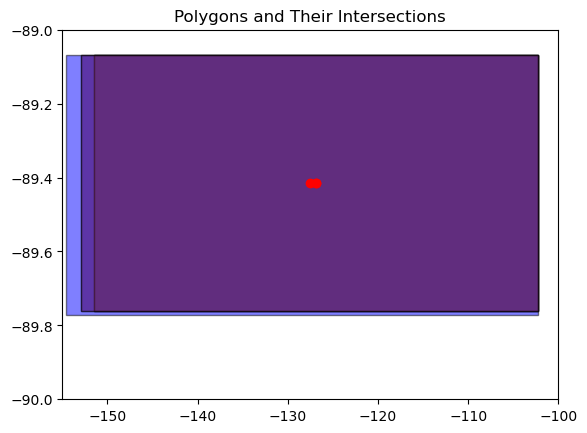

In [75]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
import random

# Define the polygons
# M139797542LE.camrange.cub.txt, M139811097LE.camrange.cub.txt, M139817894LE.camrange.cub.txt intersecting
# Connecting Ridge
polys_main = [
    Polygon([(-151.53505028004, -89.761569673896), (-151.53505028004, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.761569673896), (-151.53505028004, -89.761569673896)]),
    Polygon([(-154.58027984325, -89.770792944124), (-154.58027984325, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.770792944124), (-154.58027984325, -89.770792944124)]),
    Polygon([(-152.91945283321, -89.761234004762), (-152.91945283321, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.761234004762), (-152.91945283321, -89.761234004762)]),
]

# List to store intersections and their centroids
intersections = []
centroids = []
intersection_pairs = []

# Check all pairs of polygons for intersections
for i in range(len(polys_main)):
    for j in range(i + 1, len(polys_main)):
        inter = polys_main[i].intersection(polys_main[j])
        if not inter.is_empty:  # Check if the intersection is not empty
            intersections.append(inter)
            centroids.append(inter.centroid)
            intersection_pairs.append((i + 1, j + 1))  # Store the polygon indices (1-based)

# Output the resulting intersections and their centroids
for idx, (pair, inter, centroid) in enumerate(zip(intersection_pairs, intersections, centroids)):
    print(f"Intersection {idx + 1} between Polygon {pair[0]} and Polygon {pair[1]}: {inter}")
    print(f"Centroid {idx + 1}: {centroid}")

# Plotting
fig, ax = plt.subplots()

# Plot the original polygons
for poly in polys_main:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='blue', ec='black')

# Plot the intersections and their centroids in different colors
for inter, centroid in zip(intersections, centroids):
    if isinstance(inter, Polygon):
        ix, iy = inter.exterior.xy
        # Generate a random color for each intersection
        color = (random.random(), random.random(), random.random())
        ax.fill(ix, iy, alpha=0.5, fc=color, ec='black')  # Use the random color
        
        # Plot the centroid
        ax.plot(centroid.x, centroid.y, 'ro')  # Red dot for centroid

ax.set_xlim(-155, -100)  # Adjust x-limits as needed
ax.set_ylim(-90, -89)    # Adjust y-limits as needed
#ax.set_aspect('equal', adjustable='box')
# Set the aspect ratio
ax.set_aspect('auto')  # Allow stretching along the y-axis
ax.set_title('Polygons and Their Intersections')

plt.show()

Intersection 1 between Polygon 1 and Polygon 2: POLYGON ((-151.53505028004 -89.068587, -102.226492 -89.068587, -102.226492 -89.761569673896, -151.53505028004 -89.761569673896, -151.53505028004 -89.068587))
Centroid 1: POINT (-126.88077114001997 -89.415078336948)
Area of Intersection: 34.169976562859446
Area of Polygon 1: 34.169976562859446
Area of Polygon 2: 36.76314102093713
Satisfies the stereo image criteria for overlaps.
Intersection 2 between Polygon 1 and Polygon 3: POLYGON ((-151.53505028004 -89.068587, -102.226492 -89.068587, -102.226492 -89.761234004762, -151.53505028004 -89.761234004762, -151.53505028004 -89.068587))
Centroid 2: POINT (-126.88077114001999 -89.414910502381)
Area of Intersection: 34.15342520180265
Area of Polygon 1: 34.169976562859446
Area of Polygon 3: 35.11232748364072
Satisfies the stereo image criteria for overlaps.
Intersection 3 between Polygon 2 and Polygon 3: POLYGON ((-102.226492 -89.068587, -102.226492 -89.761234004762, -152.91945283321 -89.7612340047

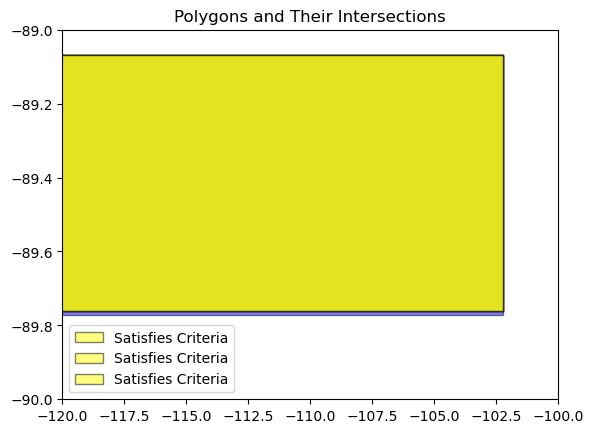

In [74]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Define the polygons
polys_main = [
    Polygon([(-151.53505028004, -89.761569673896), (-151.53505028004, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.761569673896), (-151.53505028004, -89.761569673896)]),
    Polygon([(-154.58027984325, -89.770792944124), (-154.58027984325, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.770792944124), (-154.58027984325, -89.770792944124)]),
    Polygon([(-152.91945283321, -89.761234004762), (-152.91945283321, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.761234004762), (-152.91945283321, -89.761234004762)]),
]

# List to store intersections and their centroids
intersections = []
centroids = []
intersection_pairs = []
satisfies_criteria = []

# Check all pairs of polygons for intersections
for i in range(len(polys_main)):
    for j in range(i + 1, len(polys_main)):
        inter = polys_main[i].intersection(polys_main[j])
        if not inter.is_empty:  # Check if the intersection is not empty
            intersections.append(inter)
            centroids.append(inter.centroid)
            intersection_pairs.append((i + 1, j + 1))  # Store the polygon indices (1-based)

# Output the resulting intersections and their centroids
for idx, (pair, inter, centroid) in enumerate(zip(intersection_pairs, intersections, centroids)):
    area_inter = inter.area
    area_poly1 = polys_main[pair[0] - 1].area
    area_poly2 = polys_main[pair[1] - 1].area
    print(f"Intersection {idx + 1} between Polygon {pair[0]} and Polygon {pair[1]}: {inter}")
    print(f"Centroid {idx + 1}: {centroid}")
    print(f"Area of Intersection: {area_inter}")
    print(f"Area of Polygon {pair[0]}: {area_poly1}")
    print(f"Area of Polygon {pair[1]}: {area_poly2}")

    # Check if the intersection area is more than 30% of either polygon
    if area_inter > 0.3 * area_poly1 and area_inter > 0.3 * area_poly2:
        print("Satisfies the stereo image criteria for overlaps.")
        satisfies_criteria.append(inter)  # Store intersection for plotting
    else:
        print("Does not satisfy the stereo image criteria for overlaps.")

# Plotting
fig, ax = plt.subplots()

# Plot the original polygons
for poly in polys_main:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='blue', ec='black')

# Plot the intersections and their centroids
for inter, centroid in zip(intersections, centroids):
    if isinstance(inter, Polygon):
        ix, iy = inter.exterior.xy
        if inter in satisfies_criteria:
            # Plot in yellow if it satisfies the criteria
            ax.fill(ix, iy, alpha=0.5, fc='yellow', ec='black', label='Satisfies Criteria')
        else:
            # Plot in green if it does not satisfy the criteria
            ax.fill(ix, iy, alpha=0.5, fc='green', ec='black', label='Does Not Satisfy Criteria')
        # Plot the centroid
        ax.plot(centroid.x, centroid.y, 'ro')  # Red dot for centroid

ax.set_xlim(-120, -100)
ax.set_ylim(-90, -89)  # Set y-limits to the original range
ax.set_aspect('auto')  # Allow stretching along the y-axis
ax.set_title('Polygons and Their Intersections')
ax.legend()

plt.show()

Rank 1: Intersection between Polygon 1 and Polygon 3
  Area of Intersection: 34.15342520180265
  Area of Larger Polygon: 35.11232748364072
  Ratio of Intersection to Larger Area: 0.9727
Rank 2: Intersection between Polygon 2 and Polygon 3
  Area of Intersection: 35.11232748364072
  Area of Larger Polygon: 36.76314102093713
  Ratio of Intersection to Larger Area: 0.9551
Rank 3: Intersection between Polygon 1 and Polygon 2
  Area of Intersection: 34.169976562859446
  Area of Larger Polygon: 36.76314102093713
  Ratio of Intersection to Larger Area: 0.9295


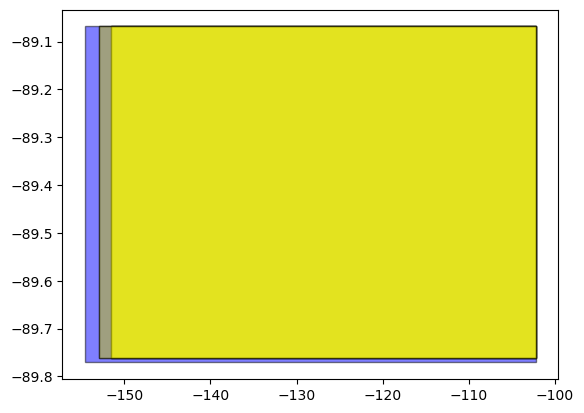

In [73]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Define the polygons
polys_main = [
    Polygon([(-151.53505028004, -89.761569673896), (-151.53505028004, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.761569673896), (-151.53505028004, -89.761569673896)]),
    Polygon([(-154.58027984325, -89.770792944124), (-154.58027984325, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.770792944124), (-154.58027984325, -89.770792944124)]),
    Polygon([(-152.91945283321, -89.761234004762), (-152.91945283321, -89.068587), 
              (-102.226492, -89.068587), (-102.226492, -89.761234004762), (-152.91945283321, -89.761234004762)]),
]

# List to store intersections and their centroids
intersections = []
centroids = []
intersection_pairs = []
intersection_ratios = []

# Check all pairs of polygons for intersections
for i in range(len(polys_main)):
    for j in range(i + 1, len(polys_main)):
        inter = polys_main[i].intersection(polys_main[j])
        if not inter.is_empty:  # Check if the intersection is not empty
            intersections.append(inter)
            centroids.append(inter.centroid)
            intersection_pairs.append((i + 1, j + 1))  # Store the polygon indices (1-based)

# Calculate areas and ratios for ranking
for idx, (pair, inter) in enumerate(zip(intersection_pairs, intersections)):
    area_inter = inter.area
    area_poly1 = polys_main[pair[0] - 1].area
    area_poly2 = polys_main[pair[1] - 1].area

    # Determine the larger area
    larger_area = max(area_poly1, area_poly2)
    ratio = area_inter / larger_area if larger_area > 0 else 0  # Avoid division by zero

    intersection_ratios.append((pair, area_inter, larger_area, ratio))

# Sort by ratio (descending)
sorted_intersections = sorted(intersection_ratios, key=lambda x: x[3], reverse=True)

# Output the sorted intersections
for rank, (pair, area_inter, larger_area, ratio) in enumerate(sorted_intersections, start=1):
    print(f"Rank {rank}: Intersection between Polygon {pair[0]} and Polygon {pair[1]}")
    print(f"  Area of Intersection: {area_inter}")
    print(f"  Area of Larger Polygon: {larger_area}")
    print(f"  Ratio of Intersection to Larger Area: {ratio:.4f}")

# Plotting
fig, ax = plt.subplots()

# Plot the original polygons
for poly in polys_main:
    x, y = poly.exterior.xy
    ax.fill(x, y, alpha=0.5, fc='blue', ec='black')

# Plot the intersections and their centroids
for inter, centroid in zip(intersections, centroids):
    if isinstance(inter, Polygon):
        ix, iy = inter.exterior.xy
        ax.fill(ix, iy, alpha=0.5, fc='yellow', ec='black')  # Plot all intersections in yellow
        ax.plot